In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.model_selection import train_test_split as TTS
from sklearn.datasets import fetch_california_housing as fch
import matplotlib.pyplot as plt

In [2]:
housevalue = fch()
X = pd.DataFrame(housevalue.data)
y = housevalue.target
X.columns = ["住户收入中位数","房屋使用年代中位数","平均房间数目"
           ,"平均卧室数目","街区人口","平均入住率","街区的纬度","街区的经度"]
X.head()

,住户收入中位数,房屋使用年代中位数,平均房间数目,平均卧室数目,街区人口,平均入住率,街区的纬度,街区的经度
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [3]:
Xtrain,Xtest,Ytrain,Ytest = TTS(X,y,test_size=0.3,random_state=420)
#恢复索引
for i in [Xtrain,Xtest]:
    i.index = range(i.shape[0])

In [4]:
#线性回归进行拟合
reg = LinearRegression().fit(Xtrain,Ytrain)
(reg.coef_*100).tolist()

[43.735893059684,
 1.0211268294493883,
 -10.780721617317667,
 62.64338275363759,
 5.216125353348089e-05,
 -0.3348509646333704,
 -41.30959378947717,
 -42.62109536208464]

In [5]:
#岭回归进行拟合
Ridge_ = Ridge(alpha=0).fit(Xtrain,Ytrain)
(Ridge_.coef_*100).tolist()

[43.73589305968402,
 1.0211268294494138,
 -10.780721617317607,
 62.643382753637354,
 5.216125353270506e-05,
 -0.33485096463335823,
 -41.30959378947677,
 -42.621095362084326]

In [6]:
#Lasso进行拟合
lasso_ = Lasso(alpha=0).fit(Xtrain,Ytrain)
(lasso_.coef_*100).tolist()

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
D:\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3769.8607714139134, tolerance: 1.917255476913148
  positive)


[43.73589305968403,
 1.021126829449405,
 -10.780721617317669,
 62.6433827536378,
 5.2161253532672325e-05,
 -0.33485096463335784,
 -41.309593789477105,
 -42.62109536208469]

In [7]:
#岭回归进行拟合
Ridge_ = Ridge(alpha=0.01).fit(Xtrain,Ytrain)
(Ridge_.coef_*100).tolist()

[43.735757206215894,
 1.021129231812175,
 -10.780460336251554,
 62.642023207756345,
 5.217068073240359e-05,
 -0.33485065170676126,
 -41.309571432291605,
 -42.62105388932426]

In [8]:
#Lasso进行拟合
lasso_ = Lasso(alpha=0.01).fit(Xtrain,Ytrain)
(lasso_.coef_*100).tolist()

[40.10568371834486,
 1.093629260786014,
 -3.7423763610244514,
 26.52403783489719,
 0.0003525368511503932,
 -0.32071293948877994,
 -40.06483047344844,
 -40.81754399163315]

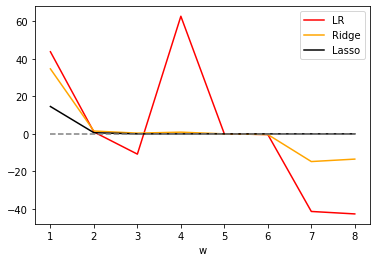

In [9]:
#加大正则项系数，观察模型的系数发生了什么变化
Ridge_ = Ridge(alpha=10**4).fit(Xtrain,Ytrain)
(Ridge_.coef_*100).tolist()
lasso_ = Lasso(alpha=10**4).fit(Xtrain,Ytrain)
(lasso_.coef_*100).tolist()
#看来10**4对于Lasso来说是一个过于大的取值
lasso_ = Lasso(alpha=1).fit(Xtrain,Ytrain)
(lasso_.coef_*100).tolist()
#将系数进行绘图
plt.plot(range(1,9),(reg.coef_*100).tolist(),color="red",label="LR")
plt.plot(range(1,9),(Ridge_.coef_*100).tolist(),color="orange",label="Ridge")
plt.plot(range(1,9),(lasso_.coef_*100).tolist(),color="k",label="Lasso")
plt.plot(range(1,9),[0]*8,color="grey",linestyle="--")
plt.xlabel('w') #横坐标是每一个特征所对应的系数
plt.legend()
plt.show()

In [10]:
from sklearn.linear_model import LassoCV
#自己建立Lasso进行alpha选择的范围
alpharange = np.logspace(-10, -2, 200,base=10)
#其实是形成10为底的指数函数

In [11]:
#10**(-10)到10**(-2)次方
alpharange.shape
Xtrain.head()
lasso_ = LassoCV(alphas=alpharange #自行输入的alpha的取值范围
               ,cv=5 #交叉验证的折数
               ).fit(Xtrain, Ytrain)

In [12]:
#查看被选择出来的最佳正则化系数
lasso_.alpha_

0.0020729217795953697

In [13]:
#调用所有交叉验证的结果
lasso_.mse_path_

array([[0.52454913, 0.49856261, 0.55984312, 0.50526576, 0.55262557],
       [0.52361933, 0.49748809, 0.55887637, 0.50429373, 0.55283734],
       [0.52281927, 0.49655113, 0.55803797, 0.5034594 , 0.55320522],
       [0.52213811, 0.49574741, 0.55731858, 0.50274517, 0.55367515],
       [0.52155715, 0.49505688, 0.55669995, 0.50213252, 0.55421553],
       [0.52106069, 0.49446226, 0.55616707, 0.50160604, 0.55480104],
       [0.5206358 , 0.49394903, 0.55570702, 0.50115266, 0.55541214],
       [0.52027135, 0.49350539, 0.55530895, 0.50076146, 0.55603333],
       [0.51995825, 0.49312085, 0.5549639 , 0.50042318, 0.55665306],
       [0.5196886 , 0.49278705, 0.55466406, 0.50013007, 0.55726225],
       [0.51945602, 0.49249647, 0.55440306, 0.49987554, 0.55785451],
       [0.51925489, 0.49224316, 0.55417527, 0.49965404, 0.55842496],
       [0.51908068, 0.49202169, 0.55397615, 0.49946088, 0.55897049],
       [0.51892938, 0.49182782, 0.55380162, 0.49929206, 0.55948886],
       [0.51879778, 0.49165759, 0.

In [14]:
lasso_.mse_path_.shape #返回每个alpha下的五折交叉验证结果

(200, 5)

In [15]:
lasso_.mse_path_.mean(axis=1) #有注意到在岭回归中我们的轴向是axis=0吗？
#在岭回归当中，我们是留一验证，因此我们的交叉验证结果返回的是，每一个样本在每个alpha下的交叉验证结果
#因此我们要求每个alpha下的交叉验证均值，就是axis=0，跨行求均值
#而在这里，我们返回的是，每一个alpha取值下，每一折交叉验证的结果
#因此我们要求每个alpha下的交叉验证均值，就是axis=1，跨列求均值
#最佳正则化系数下获得的模型的系数结果

array([0.52816924, 0.52742297, 0.5268146 , 0.52632488, 0.52593241,
       0.52561942, 0.52537133, 0.5251761 , 0.52502385, 0.52490641,
       0.52481712, 0.52475046, 0.52470198, 0.52466795, 0.52464541,
       0.52463188, 0.5246254 , 0.52462436, 0.52462744, 0.52463361,
       0.52464201, 0.52465199, 0.52466301, 0.52467466, 0.5246866 ,
       0.5246986 , 0.52471046, 0.52472203, 0.5247332 , 0.52474392,
       0.52475413, 0.52476379, 0.52477291, 0.52478147, 0.52478949,
       0.52479697, 0.52480393, 0.52481039, 0.52481639, 0.52482193,
       0.52482706, 0.52483179, 0.52483615, 0.52484016, 0.52484385,
       0.52484725, 0.52485036, 0.52485322, 0.52485584, 0.52485824,
       0.52486044, 0.52486246, 0.5248643 , 0.52486599, 0.52486753,
       0.52486895, 0.52487024, 0.52487141, 0.52487249, 0.52487348,
       0.52487437, 0.52487519, 0.52487594, 0.52487663, 0.52487725,
       0.52487782, 0.52487834, 0.52487882, 0.52487925, 0.52487965,
       0.52488001, 0.52488033, 0.52488063, 0.52488091, 0.52488

In [16]:
lasso_.coef_

array([ 4.29867301e-01,  1.03623683e-02, -9.32648616e-02,  5.51755252e-01,
        1.14732262e-06, -3.31941716e-03, -4.10451223e-01, -4.22410330e-01])

In [17]:
lasso_.score(Xtest,Ytest)

0.6038982670571436

In [18]:
#与线性回归相比如何？
reg = LinearRegression().fit(Xtrain,Ytrain)
reg.score(Xtest,Ytest)
#使用lassoCV自带的正则化路径长度和路径中的alpha个数来自动建立alpha选择的范围
ls_ = LassoCV(eps=0.00001
             ,n_alphas=300
             ,cv=5
               ).fit(Xtrain, Ytrain)

In [19]:
ls_.alpha_

0.0020954551690628535

In [20]:
ls_.alphas_ #查看所有自动生成的alpha取值

array([2.94059737e+01, 2.82952253e+01, 2.72264331e+01, 2.61980122e+01,
       2.52084378e+01, 2.42562424e+01, 2.33400142e+01, 2.24583946e+01,
       2.16100763e+01, 2.07938014e+01, 2.00083596e+01, 1.92525862e+01,
       1.85253605e+01, 1.78256042e+01, 1.71522798e+01, 1.65043887e+01,
       1.58809704e+01, 1.52811004e+01, 1.47038891e+01, 1.41484809e+01,
       1.36140520e+01, 1.30998100e+01, 1.26049924e+01, 1.21288655e+01,
       1.16707233e+01, 1.12298864e+01, 1.08057012e+01, 1.03975388e+01,
       1.00047937e+01, 9.62688384e+00, 9.26324869e+00, 8.91334908e+00,
       8.57666619e+00, 8.25270079e+00, 7.94097249e+00, 7.64101907e+00,
       7.35239575e+00, 7.07467457e+00, 6.80744372e+00, 6.55030695e+00,
       6.30288297e+00, 6.06480491e+00, 5.83571975e+00, 5.61528779e+00,
       5.40318218e+00, 5.19908842e+00, 5.00270386e+00, 4.81373731e+00,
       4.63190858e+00, 4.45694804e+00, 4.28859627e+00, 4.12660362e+00,
       3.97072991e+00, 3.82074399e+00, 3.67642348e+00, 3.53755437e+00,
      

In [21]:
ls_.alphas_.shape

(300,)

In [22]:
ls_.score(Xtest,Ytest)

0.60389154238192

In [23]:
ls_.coef_

array([ 4.29785372e-01,  1.03639989e-02, -9.31060823e-02,  5.50940621e-01,
        1.15407943e-06, -3.31909776e-03, -4.10423420e-01, -4.22369926e-01])